### During the lockdown I published my first book titled Inspiration:Thoughts on Spirituality,Technology,Wealth,Leadership and Motivation.The preview of the book can be read from the Amazon link https://lnkd.in/gj7bMQA .
### E Book is availabe for Rs 99 in India.Paperback Edition of the book is available on Amazon.com link https://lnkd.in/gkFYYMJ

In this data set we will try to explore the Dataset.Then we will try to predict the bike demand.The kernel will cover following topics.

1.Data Import and Exploration 

2.Data Visualization

3.Model Build

4.Model Evaluation 

5.Model Improvement 

6.Conclusion 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


# 1.Data Import and Exploration 

## Importing Modules

In [2]:
import matplotlib.pyplot as plt 

## Importing the dataset

In [3]:
df = pd.read_csv('../input/bike-sharing-demand/train.csv',parse_dates=['datetime'],index_col=0)
df_test = pd.read_csv('../input/bike-sharing-demand/test.csv',parse_dates=['datetime'],index_col=0)

In [4]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Datetime to Numeric Conversion

In [5]:
def add_features(df):
    df['year'] = df.index.year 
    df['month'] = df.index.month 
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour 
    

In [6]:
# Add New Features 
add_features(df)
add_features(df_test)

In [7]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


# 2.Data Visualization 

### Predicting Missing Data

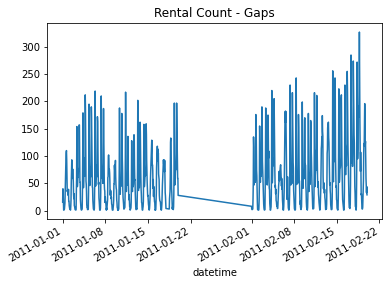

In [8]:
plt.title('Rental Count - Gaps')
df['2011-01':'2011-02']['count'].plot()
plt.show()

We can see that the the data has repeatitive nature but data for Last week of the month is missing.We may need to fill in the missing data.

### Hourly Renal Change

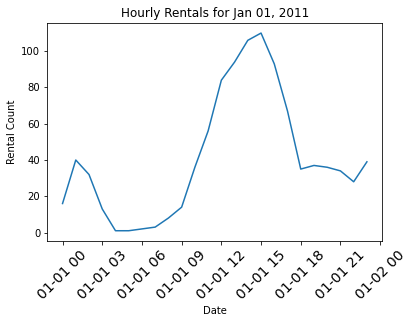

In [9]:
plt.plot(df['2011-01-01']['count'])
plt.xticks(fontsize=14,rotation=45)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.title('Hourly Rentals for Jan 01, 2011')
plt.show()

### One Month Rental 

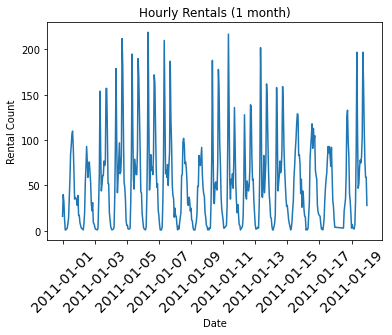

In [10]:
plt.plot(df['2011-01']['count'])
plt.xticks(fontsize=14,rotation=45)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.title('Hourly Rentals (1 month)')
plt.show()

We can see that there are few rental on the weekend compared to weekdays.

### Average Hourly Count

In [11]:
group_hour = df.groupby(['hour'])
average_by_hour = group_hour['count'].mean()

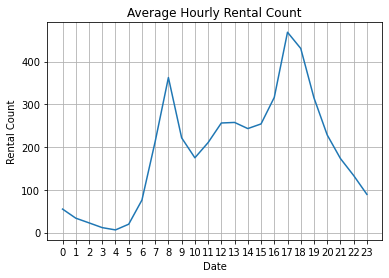

In [12]:
plt.plot(average_by_hour.index,average_by_hour)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.xticks(np.arange(24))
plt.grid(True)
plt.title('Average Hourly Rental Count')
plt.show()

We can see that the bike deman is more from 6-9 am 4-7 pm.This must be because of more demand during office hours.

### Year to Year Trend

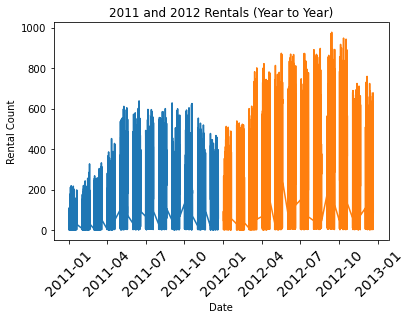

In [13]:
plt.plot(df['2011']['count'],label='2011')
plt.plot(df['2012']['count'],label='2012')
plt.xticks(fontsize=14,rotation=45)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.title('2011 and 2012 Rentals (Year to Year)')
plt.show()

We can see that the demand for bike has increased from 2011 to 2012.The trend is very similar for both years.The white spaces are the missing values which we have to predict.

### Year Month Demand

In [14]:
group_year_month = df.groupby(['year','month'])
average_year_month = group_year_month['count'].mean()

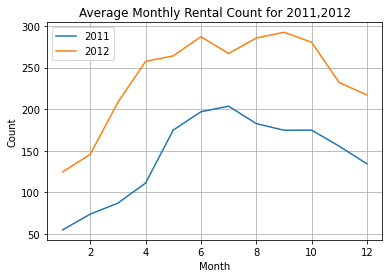

In [15]:
for year in average_year_month.index.levels[0]:
    plt.plot(average_year_month[year].index,average_year_month[year],label=year)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Monthly Rental Count for 2011,2012')
plt.show()

We can see that the demand increase from April to July and then again start declining.This is because April to July are summer months and people do more biking during summer months.

### Year Hour Demand 

In [16]:
group_year_hour = df.groupby(['year','hour'])
average_year_hour = group_year_hour['count'].mean()

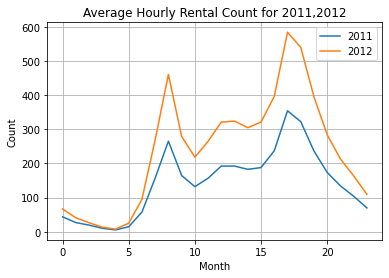

In [17]:
for year in average_year_hour.index.levels[0]:
    plt.plot(average_year_hour[year].index,average_year_hour[year],label=year)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Hourly Rental Count for 2011,2012')
plt.show()

As we had see before the demand is more during the office hours.The trend remains same for years 2011 and 2012.

### Workingday Hour Demand

In [18]:
group_workingday_hour = df.groupby(['workingday','hour'])
average_workingday_hour = group_workingday_hour['count'].mean()

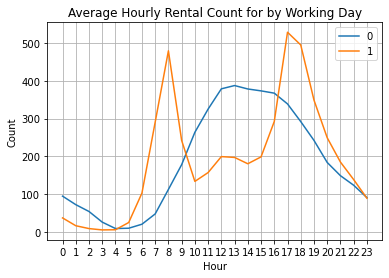

In [19]:
for workingday in average_workingday_hour.index.levels[0]:
    plt.plot(average_workingday_hour[workingday].index,average_workingday_hour[workingday],label=workingday)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(np.arange(24))
plt.grid(True)
plt.title('Average Hourly Rental Count for by Working Day')
plt.show()

Orange curve represenst the working day demand which is high during office hour 6-9 am and 4-7 pm.

On non working days the demand is more from 9 am to 6 pm.This is quite obvious considering that people like to get up little late on weekends.

### Correlation 

In [20]:
df.corr()['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
year          0.260403
month         0.166862
day           0.019826
dayofweek    -0.002283
hour          0.400601
Name: count, dtype: float64

We can see hour and count have highest correlation followed by temperature.Count and humdity has negative correlation.This means people prefer to ride bikes when temperature is higher.Bike riding is not preferred on the days when humidity is more.

### Temeperaure Vs Rentals

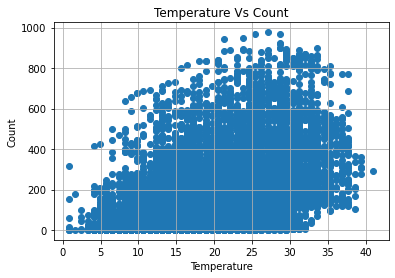

In [21]:
plt.scatter(x=df.temp,y=df['count'])
plt.grid(True)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature Vs Count')
plt.show()

We can see that there is a slight linear correlation between Temerature and rental count.

# 3.Model Build 

### Matrix of Features

In [22]:
columns = df.columns
columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'dayofweek', 'hour'],
      dtype='object')

In [23]:
X = df.drop(['count','casual','registered','atemp'],axis=1)
y = df['count']
#X=df.iloc[:,[0,1,2,3,4,5,7,8,-1,-2,-3,-4]].values#
#X = df.drop(labels='count',axis=1)

#X = df.drop(labels='count',axis=1)
#y=df.iloc[:,-6].values

#y = df['count']
#X

### Test Train Split 

In [24]:
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.loc[l]

In [25]:
rows = df.shape[0]
train = int(.7*rows)
test = rows-train

In [26]:
rows,train,test

(10886, 7620, 3266)

In [27]:
columns = df.columns
columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'dayofweek', 'hour'],
      dtype='object')

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3,random_state= 1234)

### XGBoost 

In [29]:
import xgboost as xgb
regressor = xgb.XGBRegressor(max_depth=5,n_estimator=150)
regressor

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=5,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimator=150, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)

In [30]:
regressor.fit(X_train,y_train,eval_set = [(X_train,y_train),(X_val,y_val)])

[09:17:41] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-rmse:199.76677	validation_1-rmse:197.57037
[1]	validation_0-rmse:157.71796	validation_1-rmse:155.39986
[2]	validation_0-rmse:131.80597	validation_1-rmse:129.65898
[3]	validation_0-rmse:108.09022	validation_1-rmse:106.39273
[4]	validation_0-rmse:93.08955	validation_1-rmse:91.92280
[5]	validation_0-rmse:83.42184	validation_1-rmse:82.27545
[6]	validation_0-rmse:71.61074	validation_1-rmse:70.58613
[7]	validation_0-rmse:66.51089	validation_1-rmse:66.01204
[8]	validation_0-rmse:63.28950	validation_1-rmse:63.32210
[9]	validation_0-rmse:60.04977	validation_1-rmse:60.10130
[10]	validation_0-rmse:57.02308	validation_1-rmse:57.48813
[11]	validation_0-rmse

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimator=150, n_estimators=100, n_jobs=0, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

# 4.Result Evaluation 

In [31]:
eval_result = regressor.evals_result()

In [32]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

In [33]:
print(training_rounds)

range(0, 100)


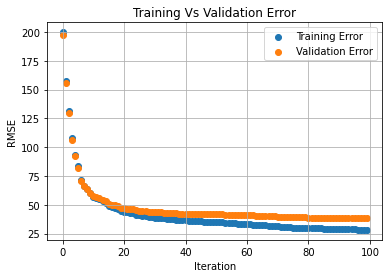

In [34]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

We can see that the validation and test error both are stablishing.So model is not overfitting or underfitting.

### Feature Importance

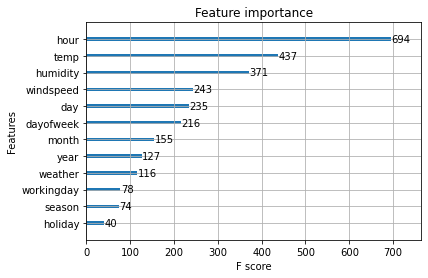

In [35]:
xgb.plot_importance(regressor)
plt.show()

We can see that the most important features in predicting the count are hour,humidity,temperature,day of the week and windspeed.

### Predicting Rentals 

In [36]:
result = regressor.predict(X_val)

In [37]:
result[:5]

array([198.10143  ,  94.84409  , 164.50955  ,   2.9925048, 349.3089   ],
      dtype=float32)

In [38]:
df_val = X_val
#df_val.dtypes

In [39]:
df_val['count_predicted'] = result
#df_val

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df_val['count_predicted'].describe()

count    3266.000000
mean      193.998169
std       174.451691
min       -86.754608
25%        42.781776
50%       157.593697
75%       291.124367
max       892.743530
Name: count_predicted, dtype: float64

In [41]:
df_val[df_val['count_predicted'] < 0]

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted
datetime,,,,,,,,,,,,,
2012-03-03 04:00:00,1,0,0,2,14.76,93,12.9980,2012,3,3,5,4,-9.943510
2012-12-10 01:00:00,4,0,1,2,14.76,100,0.0000,2012,12,10,0,1,-11.044115
2011-02-14 03:00:00,1,0,1,1,13.94,46,15.0013,2011,2,14,0,3,-5.062804
2011-12-07 01:00:00,4,0,1,2,18.86,100,16.9979,2011,12,7,2,1,-6.429919
2011-02-13 07:00:00,1,0,0,2,9.02,55,0.0000,2011,2,13,6,7,-23.469564
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-04-06 02:00:00,2,0,1,1,9.84,70,8.9981,2011,4,6,2,2,-0.573122
2011-01-07 02:00:00,1,0,1,2,8.20,69,15.0013,2011,1,7,4,2,-5.134410
2011-03-06 20:00:00,1,0,0,3,11.48,100,27.9993,2011,3,6,6,20,-0.085364


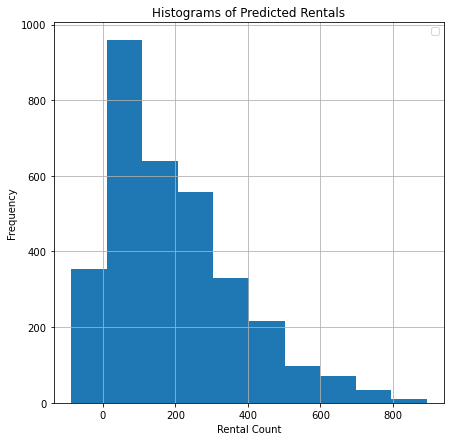

In [42]:
df_val['count_predicted'].hist(figsize = (7,7))
plt.xlabel('Rental Count')
plt.ylabel('Frequency')
plt.title('Histograms of Predicted Rentals')
plt.legend()
plt.show()

We can see that some of the predictions of rentals are negative.This is not practically right.So we need to correct or remove all the negative predictions.

In [43]:
def adjust_count(x):
    if x < 0:
        return 0
    else:
        return x

In [44]:
df_val['count_predicted'] = df_val['count_predicted'].map(adjust_count)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
df_val[df_val['count_predicted'] < 0]

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted
datetime,,,,,,,,,,,,,


We have converted all the negative rental prediction to zero.

### Actual Vs Predicted 

In [46]:
df_val['count']=y_val
df_val.reset_index(drop=True, inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


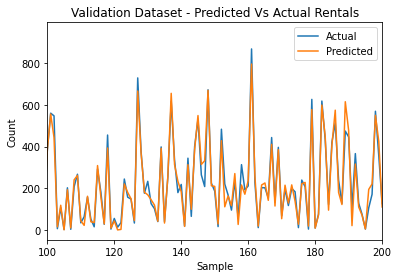

In [47]:
plt.plot(df_val['count'],label='Actual')
plt.plot(df_val['count_predicted'],label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Count')
plt.xlim([100,200])
plt.title('Validation Dataset - Predicted Vs Actual Rentals')
plt.legend()
plt.show()

### Residual (Error) Distribution

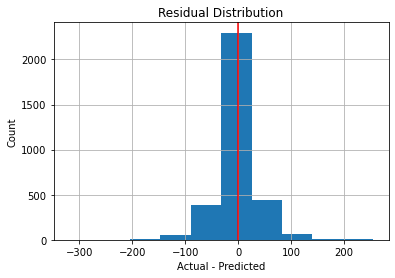

In [48]:
residuals = (df_val['count'] - df_val['count_predicted'])
plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('Residual Distribution')
plt.axvline(color='r')
plt.show()

We can see that the residual histogram is quite balanced with equal number of over and under prediction.

In [49]:
value_counts = (residuals > 0).value_counts(sort=False)
print('Under Estimation: {0:0.2f}'.format(value_counts[True]/len(residuals)))
print('Over Estimation: {0:0.2f}'.format(value_counts[False]/len(residuals)))

Under Estimation: 0.49
Over Estimation: 0.51


### RSME

In [50]:
from sklearn.metrics import mean_squared_error
print("RSME:{0:0.2f}".format(mean_squared_error(df_val['count'],df_val['count_predicted'])**0.5))

RSME:38.36


# 5.Model Improvement 

### Log Transform of Rental Count 

In [51]:
df2 = pd.read_csv('../input/bike-sharing-demand/train.csv',parse_dates=['datetime'],index_col=0)

In [52]:
add_features(df2)

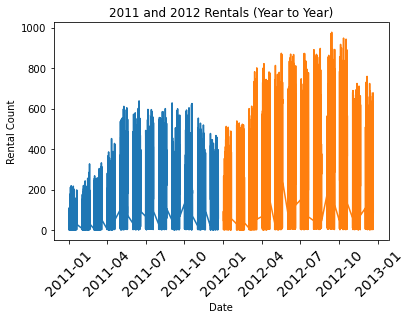

In [53]:
plt.plot(df2['2011']['count'],label='2011')
plt.plot(df2['2012']['count'],label='2012')
plt.xticks(fontsize=14,rotation=45)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.title('2011 and 2012 Rentals (Year to Year)')
plt.show()

Now we will apply log transform to the rental count to transform the predicted value.

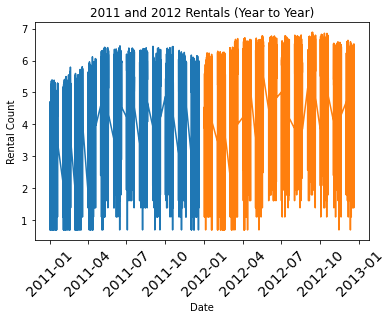

In [54]:
plt.plot(df2['2011']['count'].map(np.log1p),label='2011')
plt.plot(df2['2012']['count'].map(np.log1p),label='2012')
plt.xticks(fontsize=14,rotation=45)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.title('2011 and 2012 Rentals (Year to Year)')
plt.show()

After log transformation it smoothens out the seasonality and trend.This help to improve the accuracy of prediction.

### Boxplot

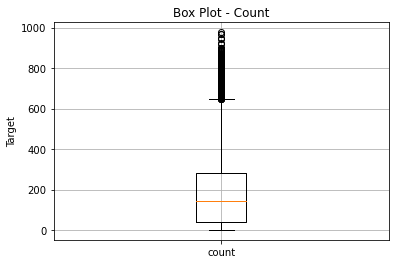

In [55]:
plt.boxplot([df2['count']],labels=['count'])
plt.title('Box Plot - Count')
plt.ylabel('Target')
plt.grid(True)

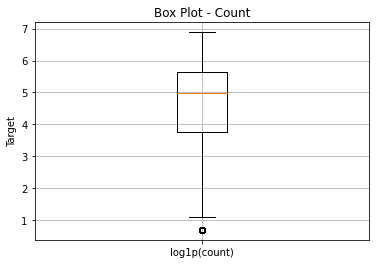

In [56]:
plt.boxplot([df2['count'].map(np.log1p)],labels=['log1p(count)'])
plt.title('Box Plot - Count')
plt.ylabel('Target')
plt.grid(True)

Now we can see that the data has transformed from 0 to 7.Log transform bring all the values to similar scale therby improving accuracy of prediction.

In [57]:
df2['count'] = df2['count'].map(np.log1p)
#df2

In [58]:
df2.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2.833213,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,3.713572,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,3.496508,2011,1,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2.639057,2011,1,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,0.693147,2011,1,1,5,4


### Model Built 

In [59]:
X2 = df2.drop(['count','casual','registered','atemp'],axis=1)
y2 = df2['count']
#y2

In [60]:
from sklearn.model_selection import train_test_split
X2_train, X2_val, y2_train, y2_val = train_test_split(X2,y2,test_size=0.3,random_state= 1234)

In [61]:
import xgboost as xgb
regressor2 = xgb.XGBRegressor(max_depth=5,n_estimator=150)
regressor2

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=5,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimator=150, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)

In [62]:
regressor2.fit(X2_train,y2_train,eval_set = [(X2_train,y2_train),(X2_val,y2_val)])

[09:17:58] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-rmse:3.06112	validation_1-rmse:3.08080
[1]	validation_0-rmse:2.18210	validation_1-rmse:2.19358
[2]	validation_0-rmse:1.57610	validation_1-rmse:1.58378
[3]	validation_0-rmse:1.15611	validation_1-rmse:1.16380
[4]	validation_0-rmse:0.87030	validation_1-rmse:0.88123
[5]	validation_0-rmse:0.67346	validation_1-rmse:0.68652
[6]	validation_0-rmse:0.55369	validation_1-rmse:0.56953
[7]	validation_0-rmse:0.46653	validation_1-rmse:0.48568
[8]	validation_0-rmse:0.41719	validation_1-rmse:0.43974
[9]	validation_0-rmse:0.38727	validation_1-rmse:0.41271
[10]	validation_0-rmse:0.36328	validation_1-rmse:0.39265
[11]	validation_0-rmse:0.34991	validation_1-rmse:0.3

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimator=150, n_estimators=100, n_jobs=0, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

### Result Evaluation

In [63]:
eval_result2 = regressor2.evals_result()

In [64]:
training_rounds2 = range(len(eval_result2['validation_0']['rmse']))

In [65]:
print(training_rounds2)

range(0, 100)


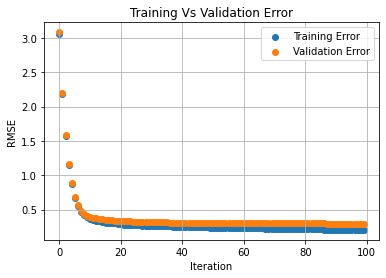

In [66]:
plt.scatter(x=training_rounds2,y=eval_result2['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds2,y=eval_result2['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

We can see that the convergence of train and validation accuracy has improved by take the log of rentals

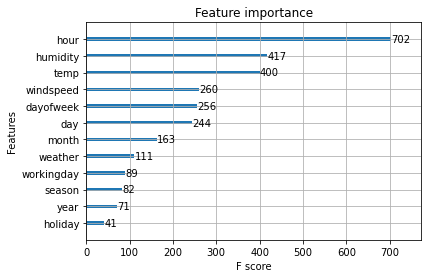

In [67]:
xgb.plot_importance(regressor2)
plt.show()

We can see that their is slight change in the feature importance.Windspeed has taken the place of day of the week.

### Predicting Rentals

In [68]:
result2 = regressor2.predict(X2_val)

In [69]:
result2[:5]

array([5.323791 , 4.2896333, 4.862355 , 1.6725917, 5.7143593],
      dtype=float32)

In [70]:
df2_val = X2_val
#df_val.dtypes

In [71]:
df2_val['count_predicted'] = result2
#df_val

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
df2_val['count_predicted'].describe()

count    3266.000000
mean        4.615743
std         1.386302
min         0.259707
25%         3.854278
50%         5.028865
75%         5.624707
max         6.884830
Name: count_predicted, dtype: float64

Now we can notice that there are no negative rental predictions.Do applying the log transformation has helped us to improve our rental predications.

In [73]:
df_val[df_val['count_predicted'] < 0]

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted,count


### Actual Vs Predicted

In [74]:
df2_val['count']=y2_val
df2_val.reset_index(drop=True, inplace=True)
#df2_val

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
df2_val['count'] = df2_val['count'].map(np.expm1)
df2_val['count_predicted'] = df2_val['count_predicted'].map(np.expm1)
#df2_val

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


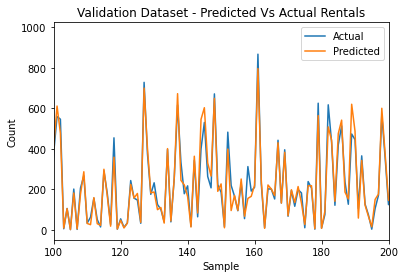

In [76]:
plt.plot(df2_val['count'],label='Actual')
plt.plot(df2_val['count_predicted'],label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Count')
plt.xlim([100,200])
plt.title('Validation Dataset - Predicted Vs Actual Rentals')
plt.legend()
plt.show()

In [77]:
from sklearn.metrics import mean_squared_error
print("RSME:{0:0.2f}".format(mean_squared_error(df2_val['count'],df2_val['count_predicted'])**0.5))

RSME:42.75


# Conclusion

1.We explored the dataset and from the data we split date into day,week,monthly and yearly data.We saw that the renal demand is has trend which change with day,week months and the years.

2.The demand for bike rentals is more in weekdays compared to weekend.

3.We can see that the bike demand is more from 6-9 am 4-7 pm on working days.This must be because of more demand during office hours.On non working days the demand is more from 9 am to 6 pm.This is quite obvious considering that people like to get up little late on weekends.

4.We can see that the demand for bike has increased from 2011 to 2012.The trend is very similar for both years.The white spaces are the missing values which we have to predict.

5.We can see that the demand increase from April to July and then again start declining.This is because April to July are summer months and people do more biking during summer months.

6.From the correlation matrix we can see that bike demand is more when the temperature is higer and lower when the humidity is lower.

7.We used XGBoost to predict the rentals.We saw some negative predictions which we had removed.The training and validation accuracy stablised.But we can further mprove this model by feature engineering.

8.We tried out feature engineering by doing a log transformation on the rental count.This reduces the scale of the data and also reduces the affect of seasonality and time based changes in the data.


# TO BE CONTINUED